<a href="https://colab.research.google.com/github/laughingbud/conquer/blob/main/GWP3_Group766.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Detecting a regime change**

In [1]:
!git clone https://github.com/laughingbud/conquer.git

Cloning into 'conquer'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 26 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.


In [2]:
!pip install arch
!pip install pmdarima
!pip install yfinance
!pip install nasdaq-data-link

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 14.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 53.4 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 340.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pylab
import yfinance as yf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from numpy import log
from arch.unitroot import ADF, KPSS
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning) 
# setting ignore as a parameter for warnings and further adding category
import nasdaqdatalink
nasdaqdatalink.ApiConfig.api_key = "hqUqp5N6dzYktzNq_xh3"

**Markov‐switching model definition:**

A regime-switching model known as the **Markov switch** is one in which the transitions between regimes develop in accordance with an unobserved Markov chain.

**Description:**
Markov switching regression models specify a first order Markov process for the regime probabilities. Here, regimes are a finite number of distinct states of a variable. 

A Markov process is a stochastic process whose property is that the current state determines the future states but not the past states. In this context, a Markov process has a finite and discrete number of states and has a property of stationarity such that the transition probabilities are dependent on time difference between the two points. The transition matrix of discrete latent state $s_t$ has a transition matrix which allows for two possible states at time t is as follows.
$$
P = 
\begin{bmatrix}
p_{11} & p_{21} \\
p_{12} & p_{22} \\
\end{bmatrix}
$$

In general, the probability that $s_t$ is equal to j ∈ (1, . . . , k) depends only on the most recent realization, $s_{t−1}$, and is given by
Pr($s_{t}$ = j|$s_{t−1}$ = i) = $p_{ij}$. Similarly all transition probabilities can be captured in a *k* x *k* matrix like the *2* x *2* one above.

Markov switching dynamic regression's general specification is written as:
$$
 y_t = \mu_{s_t} + x_tα + z_tβ_{s_t} + ε_s
$$
where $y_t$ is the dependent variable, $\mu_{s_t}$ is the state dependent intercept or constant, $x_t$ is a vector of exogenous
variables with state-invariant coefficients $α$ , $z_t$ is a vector of exogenous variables with state-dependent coefficients $β$, and $ϵ_s$ is an i.i.d. normal error with mean 0 and state-dependent variance $σ^2_s$
. $x_t$ and
$z_t$ may contain lags of $y_t$.

The conditional density of $y_t$ is given by $f$($y_t$|$s_t$ = i, $y_{t−1}$; θ) for i = 1, . . . , k. The marginal
density of $y_t$ is obtained by weighting the conditional densities by their respective probabilities and
is written as:
$$
f(x) = \sum_{i=1}^{k} f(y_t|s_t = i, y_{t−1}; θ) * Pr(s_t=i;θ)
$$
Constructing the likelihood function requires estimating the probability that $s_t$ takes on a specific
value using the data through time t and model parameters θ. Let $Pr(s_t=i|y_t;θ)$ denote the conditional
probability of observing st = i based on data until time t.
$$
Pr(s_t=i|y_t;θ) =  \frac{f(y_t|s_t = i, y_{t−1}; θ) * Pr(s_t=i|y_{t-1};θ)}{f(y_t|y_{t−1}; θ)}
$$
where $f(y_t|y_{t−1}; θ)$ is the likelihood of $y_t$ and $Pr(s_t=i|y_{t-1};θ)$ is the forecasted probability of
$s_t$ = i given observation until time t − 1. 

$$
Pr(s_t=i|y_{t-1};θ) = \sum_{j=1}^{k} Pr(s_t=i|s_{t-1}=j, y_{t-1};θ) * Pr(s_{t-1}=j|y_{t-1};θ)
$$

In [4]:
#Importing currency price data from github repo
data_set = pd.read_csv('conquer/fin_data_set_3.csv')
data_set.index = data_set.Date #Set dates as index
data_set=data_set.drop(columns='Date') #Drop the extra date column
data_set = data_set.ffill() #forward fill to eliminate Nan on 2019/05/22
data_set.index = pd.to_datetime(data_set.index) #convert index to datetime
data_set.tail(2)

,USDKRW,USDTWD,USDTHB
Date,,,
2022-12-22,1280.77002,30.679001,34.650002
2022-12-23,1279.01001,30.726999,34.716999


In [5]:
rets = np.log(data_set)-np.log(data_set.shift(1)) 
rets=rets.dropna()
rets.head(2)#Calculate daily log return/first order differencing of currencies

,USDKRW,USDTWD,USDTHB
Date,,,
2017-12-26,-0.000697,0.000736,-0.000673
2017-12-27,-0.001227,0.001136,0.001864


In [6]:
tickers = ['FRED/RECPROUSM156N','UMICH/SOC1','FRED/USEPUINDXD','FRED/INDPRO']
ndq_data = nasdaqdatalink.get(tickers, collapse="monthly")['2016':]
ndq_data.columns = ['RECPROB','MCONSENT','POLUNCERT','INDPRO']
ndq_data=ndq_data.ffill()
ndq_data.head(2) #Importing econ data from nasdaq data link

,RECPROB,MCONSENT,POLUNCERT,INDPRO
Date,,,,
2016-01-31,1.00,92.0,94.57,99.4797
2016-02-29,1.16,91.7,65.74,98.9583


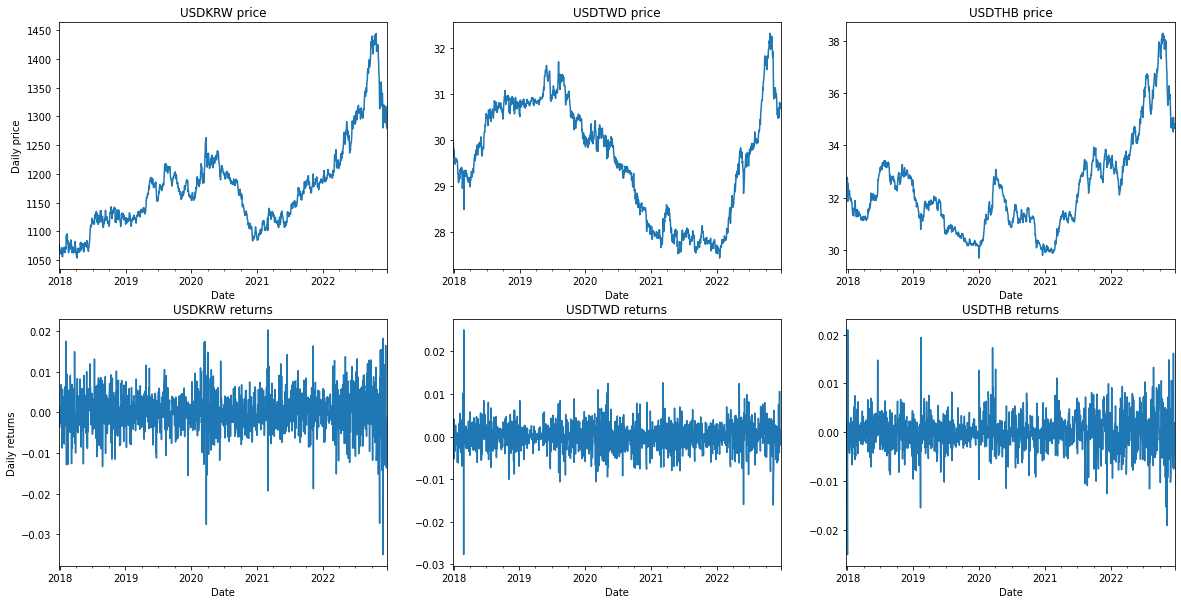

In [7]:
# plot currency price series together to visualize any interesting pattterns
fig, ax = plt.subplots(2, 3, figsize=(20, 10))
data_set['USDKRW'].plot(ax=ax[0,0],title='USDKRW price',ylabel='Daily price')
data_set['USDTWD'].plot(ax=ax[0,1],title='USDTWD price')
data_set['USDTHB'].plot(ax=ax[0,2],title='USDTHB price')
rets['USDKRW'].plot(ax=ax[1,0],title='USDKRW returns',ylabel='Daily returns')
rets['USDTWD'].plot(ax=ax[1,1],title='USDTWD returns')
rets['USDTHB'].plot(ax=ax[1,2],title='USDTHB returns')
plt.show()

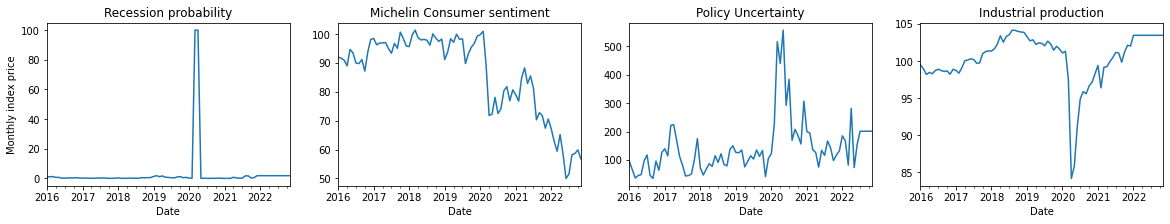

In [8]:
# plot currency price series together to visualize any interesting pattterns
fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20, 3))
ndq_data.RECPROB.plot(ax=ax1,title='Recession probability',ylabel='Monthly index price')
ndq_data.MCONSENT.plot(ax=ax2,title='Michigan Consumer sentiment')
ndq_data.POLUNCERT.plot(ax=ax3,title='Policy Uncertainty')
ndq_data.INDPRO.plot(ax=ax4,title='Industrial production')
plt.show()

We start with USDTWD for an initial model calibration exercise as there is significant trend in its time series 2022 which could be a regime shift.

Text(0.5, 1.0, 'Additive model - residual')

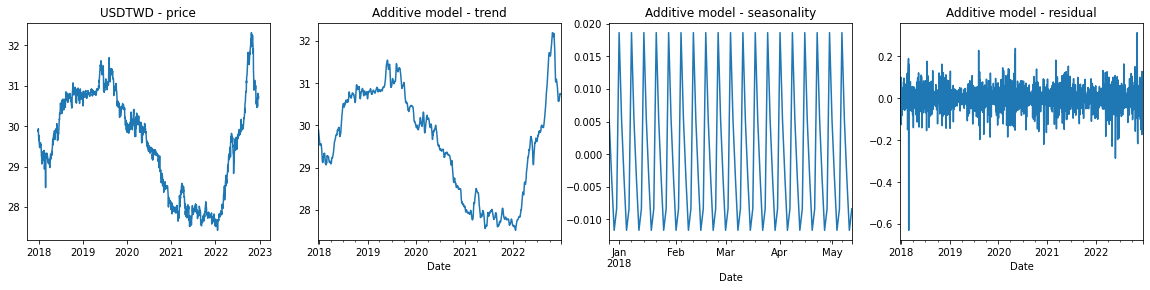

In [9]:
result_add = sm.tsa.seasonal_decompose(data_set['USDTWD'], model='additive')
result_mul = sm.tsa.seasonal_decompose(data_set['USDTWD'], model='multiplicative')
result_add_2022 = sm.tsa.seasonal_decompose(data_set['USDTWD']['2022':], model='additive')
# plot original series and components using additive model
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
ax[0].plot(data_set['USDTWD']); ax[0].set_title('USDTWD - price')
result_add.trend.plot(ax=ax[1]); ax[1].set_title('Additive model - trend')
result_add.seasonal[1:100].plot(ax=ax[2]); ax[2].set_title('Additive model - seasonality')
result_add.resid.plot(ax=ax[3]); ax[3].set_title('Additive model - residual')

Decomposition of USDTWD price into trend, seasonality and residual indicate that trend dominates although there is some short term seasonality (5 day). We look into any variation in volatility or autocorrelation below to see further signs of non-stationarity and regime change.

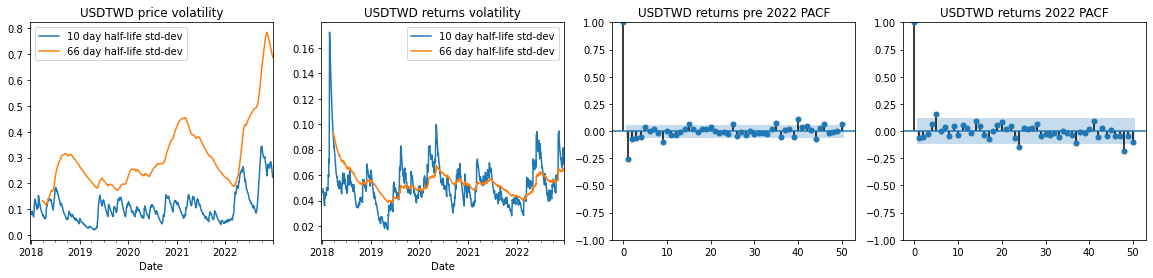

In [10]:
# Below we plot exponentially weighted moving avg volatility in price and 
#first order differencing and returns auto correlation in two difference regimes
fig, ax = plt.subplots(1, 4, figsize=(20, 4))
np.log(data_set['USDTWD']).ewm(halflife=10,min_periods=10).std().mul(np.sqrt(260)).plot(ax=ax[0],title='USDTWD price volatility')
np.log(data_set['USDTWD']).ewm(halflife=66,min_periods=66).std().mul(np.sqrt(260)).plot(ax=ax[0])
ax[0].legend(['10 day half-life std-dev','66 day half-life std-dev'])
rets['USDTWD'].ewm(halflife=10,min_periods=10).std().mul(np.sqrt(260)).plot(ax=ax[1],title='USDTWD returns volatility')
rets['USDTWD'].ewm(halflife=66,min_periods=66).std().mul(np.sqrt(260)).plot(ax=ax[1])
ax[1].legend(['10 day half-life std-dev','66 day half-life std-dev'])
sm.graphics.tsa.plot_pacf(rets['USDTWD'][:'2021'], title="USDTWD returns pre 2022 PACF", lags=50,ax=ax[2])
sm.graphics.tsa.plot_pacf(rets['USDTWD']['2022':], title="USDTWD returns 2022 PACF", lags=50,ax=ax[3])
plt.show()

There is an increase in volatility of USDTWD over time as we see in leftmost chart however for its returns there are a few periods of higher volatility than usual. USDTWD returns PACF plots for two different time ranges show how lag 1 used to show significant reversal but not in 2022. Overall, we assess given the significant changes starting 2022 in mean, standard deviation and autocorrelation, there is likely a regime change in 2022 and the full time-series is very unlikely to be stationary.

In [11]:
#ADF Test with Drift and Trend for USDTWD
adf_krw = ADF(np.log(data_set['USDTWD']), trend="ct", method="bic")
print("\nTest statistics and critical values: \n", adf_krw)
#ADF Test with Drift and Trend for USDTWD first differencing / returns
adf_krw_diff = ADF(np.log(data_set['USDTWD']).diff().dropna(), trend="ct", method="bic")
print("\nTest statistics and critical values: \n", adf_krw_diff)


Test statistics and critical values: 
    Augmented Dickey-Fuller Results   
Test Statistic                 -0.770
P-value                         0.968
Lags                                1
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Test statistics and critical values: 
    Augmented Dickey-Fuller Results   
Test Statistic                -44.298
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


First difference of the USDTWD price is stationarity as the p-value is less than 0.05 but the original USDTWD price series not stationary.

In [12]:
# KPSS test with -1 lag
print(KPSS(np.log(data_set['USDTWD']), trend="ct", lags=-1))
print(KPSS(rets['USDTWD'], trend="ct", lags=-1))

    KPSS Stationarity Test Results   
Test Statistic                  0.632
P-value                         0.000
Lags                               23
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
    KPSS Stationarity Test Results   
Test Statistic                  0.187
P-value                         0.020
Lags                               23
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.


With KPSS test, we cannot reject the null hypothesis that USDTWD price series is stationary. However for the first differenced time series, at 5% significance level, we can reject null hypothesis and conclude that first difference of USDTWD is stationary.

Based on the above analysis, we can model USDTWD first difference (or returns) using Markov switching dynamic regression model as there's evidence of Auto-regressive process and regime change.

In [13]:
msdr_model = sm.tsa.MarkovAutoregression(endog=rets['USDTWD'].iloc[1:], 
                                         k_regimes=2,order=1,freq='B',trend='c',
                                         switching_variance=True)
msdr_model_results = msdr_model.fit(iter=1000)

In [14]:
msdr_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                   USDTWD   No. Observations:                 1302
Model:             MarkovAutoregression   Log Likelihood                5652.368
Date:                  Mon, 09 Jan 2023   AIC                         -11288.736
Time:                          11:17:18   BIC                         -11247.363
Sample:                      12-27-2017   HQIC                        -11273.214
                           - 12-23-2022                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002   8.25e-05      2.137      0.033    1.46e-05       0.000
sigma2      5.918e-06    6.3e-07      9.399      0.000    4.68e-06    7.15e-06
ar.L1         -0.1630      0.044     -3.702      0.000      -0.249      -0.077
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.460      0.144      -0.001       0.000
sigma2      2.807e-05   4.55e-06      6.175      0.000    1.92e-05     3.7e-05
ar.L1         -0.2545      0.076     -3.363      0.001      -0.403      -0.106
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9321      0.021     43.692      0.000       0.890       0.974
p[1->0]        0.2243      0.071      3.156      0.002       0.085       0.364
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

**endog** is the endogenous/dependent variable time-series

**k_regimes** is the number of regimes

**exog** is the exogenous/independent variable time series. We'll use our lagged endogenous variable as exog as we are interested in univariate analysis.

**trend** helps to include trend(t), intercept(c), both (ct) or none (nc).

**switching_variance** is a boolean to allow regime-specific heteroskedasticity (error-term variance)

**switching_trend** is a boolean to allow all trend coefficients to switch across regimes, if set true

**switching_exog** is a boolean to allow all regression coefficients to switch across regimes, if set true

**exog_tvtp** is used in calculating time varying probabilities with provided exogenous or lagged variables

**order** is the autoregressive model order (p)

**freq** is the frequency of the time-series variables

We choose USDTWD returns as our **endogenous variable** with **autoregressive order** 1 . Further we allow **switching variance**, to assume two states/regimes (high and low) as a starting point and allow **trend** variable to add a constant term in both regimes.

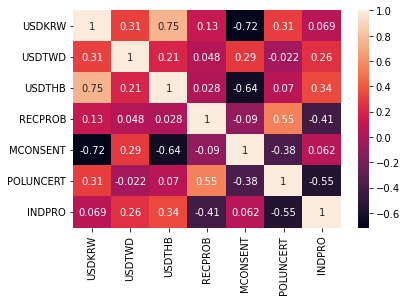

In [15]:
sns.heatmap(pd.concat([data_set,ndq_data],axis=1).corr(), annot=True) 
plt.show() #Check correlations between the macro indicators and USD-Asia

The Recession probability index looks to be moderately correlated with Policy uncertainty. Also, the Industrial production index is moderately negatively correlated with Recession probability. Michigan consumer sentiment is also mildly negatively correlated to Policy uncertainty. All of these results sound economically reasonable and intuitive. Further, USD (vs Asia) is mildly positively correlated to US industrial production and also moderate to strong negatively correlated to Michigan consumer sentiment (USDKRW and USDTHB).

We've already looked at USDTWD while calibrating the model. Now we select three most interesting datasets to analyze - USDKRW, Michigan consumer sentiment and Industrial production due to the relations we identified above.

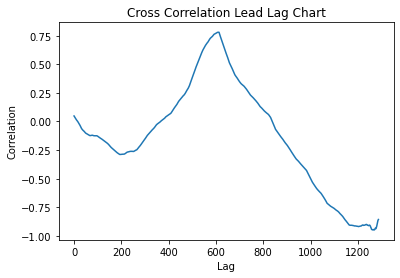

In [75]:
# Compute the cross-correlation function
# correlation = sm.tsa.ccf(ndq_data.INDPRO[data_set.USDKRW.resample('M').sum().index[0]:],
#                          data_set.USDKRW.resample('M').sum()[:-1])
correlation = sm.tsa.ccf(ndq_data.INDPRO.resample('B').ffill()[data_set.USDKRW.index[0]:data_set.USDKRW.index[-1]],
                         data_set.USDKRW.resample('B').ffill()[:ndq_data.INDPRO.index[-1]])
# Create the lead lag range
lag_range = range(len(correlation))

# Plot the lead lag chart
plt.plot(lag_range, correlation)
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.title('Cross Correlation Lead Lag Chart')
plt.show()

In [ ]:
# rets.hist(bins=50, figsize=(15,8))
# plt.show()

In [ ]:
# stats.probplot(rets['USDKRW'],dist="norm",plot=pylab)
# pylab.show()

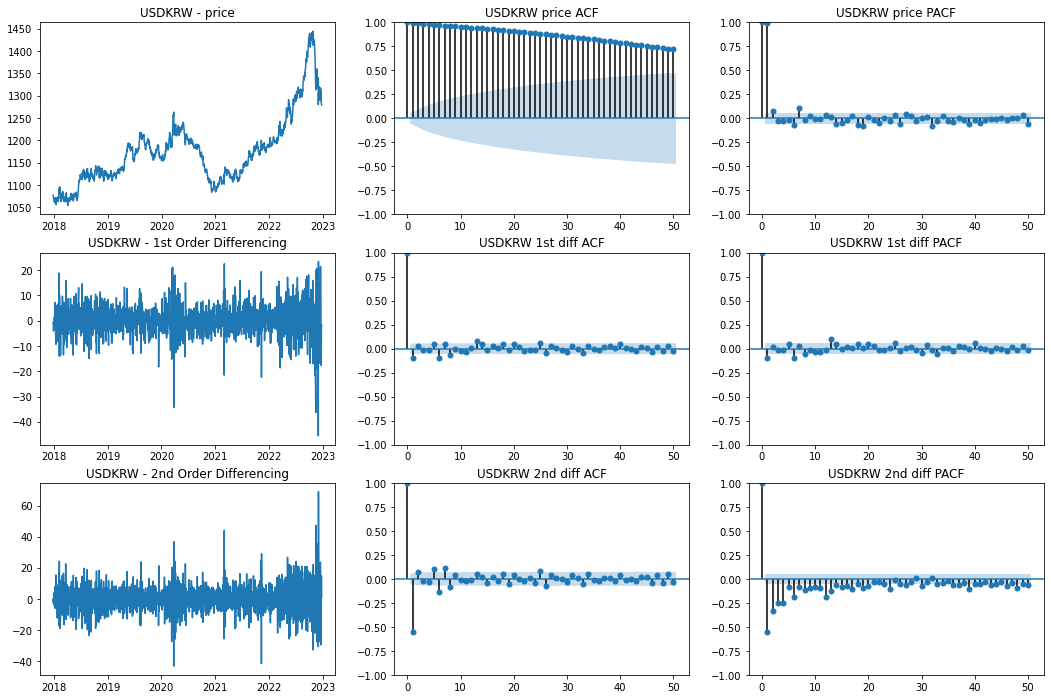

In [71]:
# plot the USDKRW series followed by ACF and PACF in first row
# first order and second order differencing plots in the next two rows
fig, ax = plt.subplots(3, 3, figsize=(18, 12))
ax[0, 0].plot(data_set['USDKRW']); ax[0, 0].set_title('USDKRW - price')
sm.graphics.tsa.plot_acf(data_set['USDKRW'], title="USDKRW price ACF", lags=50, ax=ax[0, 1])
sm.graphics.tsa.plot_pacf(data_set['USDKRW'], title="USDKRW price PACF", lags=50, ax=ax[0, 2])

# 1st Differencing
ax[1, 0].plot(data_set['USDKRW'].diff()); ax[1, 0].set_title('USDKRW - 1st Order Differencing')
sm.graphics.tsa.plot_acf(data_set['USDKRW'].diff().dropna(), title="USDKRW 1st diff ACF", lags=50, ax=ax[1, 1])
sm.graphics.tsa.plot_pacf(data_set['USDKRW'].diff().dropna(), title="USDKRW 1st diff PACF", lags=50, ax=ax[1, 2])

# 2nd Differencing
ax[2, 0].plot(data_set['USDKRW'].diff().diff()); ax[2, 0].set_title('USDKRW - 2nd Order Differencing')
sm.graphics.tsa.plot_acf(data_set['USDKRW'].diff().diff().dropna(), title="USDKRW 2nd diff ACF", lags=50, ax=ax[2, 1])
sm.graphics.tsa.plot_pacf(data_set['USDKRW'].diff().diff().dropna(), title="USDKRW 2nd diff PACF", lags=50, ax=ax[2, 2])
plt.show()

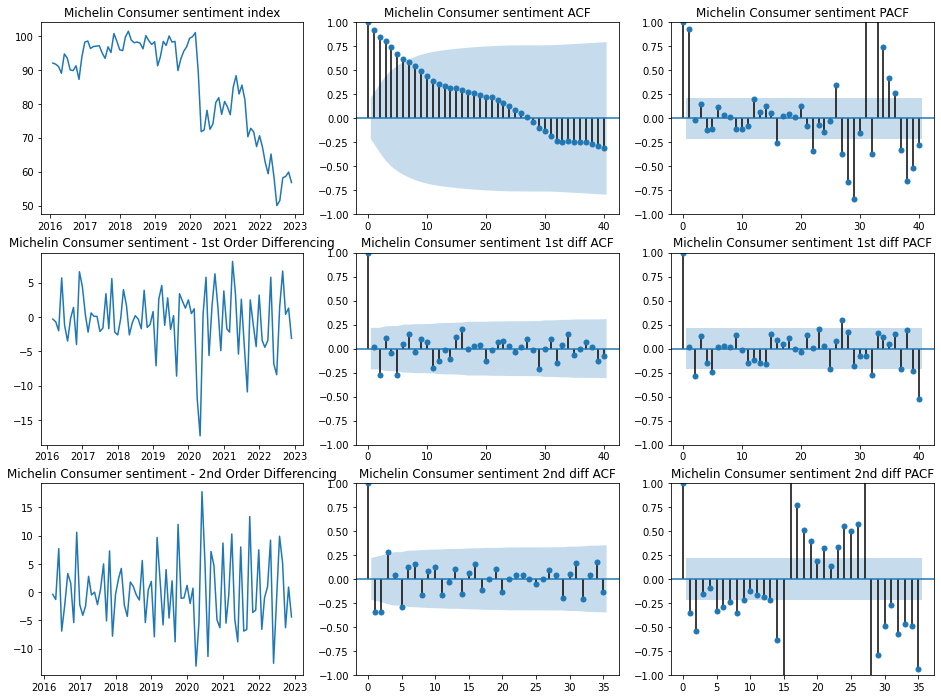

In [72]:
# plot the Michigan consumer sentiment  followed by ACF and PACF in first row
# first order and second order differencing plots in the next two rows
fig, ax = plt.subplots(3, 3, figsize=(16, 12))
ax[0, 0].plot(ndq_data['MCONSENT']); ax[0, 0].set_title('Michigan Consumer sentiment index')
sm.graphics.tsa.plot_acf(ndq_data['MCONSENT'], title="Michigan Consumer sentiment ACF", lags=40, ax=ax[0, 1])
sm.graphics.tsa.plot_pacf(ndq_data['MCONSENT'], title="Michigan Consumer sentiment PACF", lags=40, ax=ax[0, 2])

# 1st Differencing
ax[1, 0].plot(ndq_data['MCONSENT'].diff()); ax[1, 0].set_title('Michigan Consumer sentiment - 1st Order Differencing')
sm.graphics.tsa.plot_acf(ndq_data['MCONSENT'].diff().dropna(), title="Michigan Consumer sentiment 1st diff ACF", lags=40, ax=ax[1, 1])
sm.graphics.tsa.plot_pacf(ndq_data['MCONSENT'].diff().dropna(), title="Michigan Consumer sentiment 1st diff PACF", lags=40, ax=ax[1, 2])

# 2nd Differencing
ax[2, 0].plot(ndq_data['MCONSENT'].diff().diff()); ax[2, 0].set_title('Michigan Consumer sentiment - 2nd Order Differencing')
sm.graphics.tsa.plot_acf(ndq_data['MCONSENT'].diff().diff().dropna(), title="Michigan Consumer sentiment 2nd diff ACF", lags=35, ax=ax[2, 1])
sm.graphics.tsa.plot_pacf(ndq_data['MCONSENT'].diff().diff().dropna(), title="Michigan Consumer sentiment 2nd diff PACF", lags=35, ax=ax[2, 2])
plt.show()

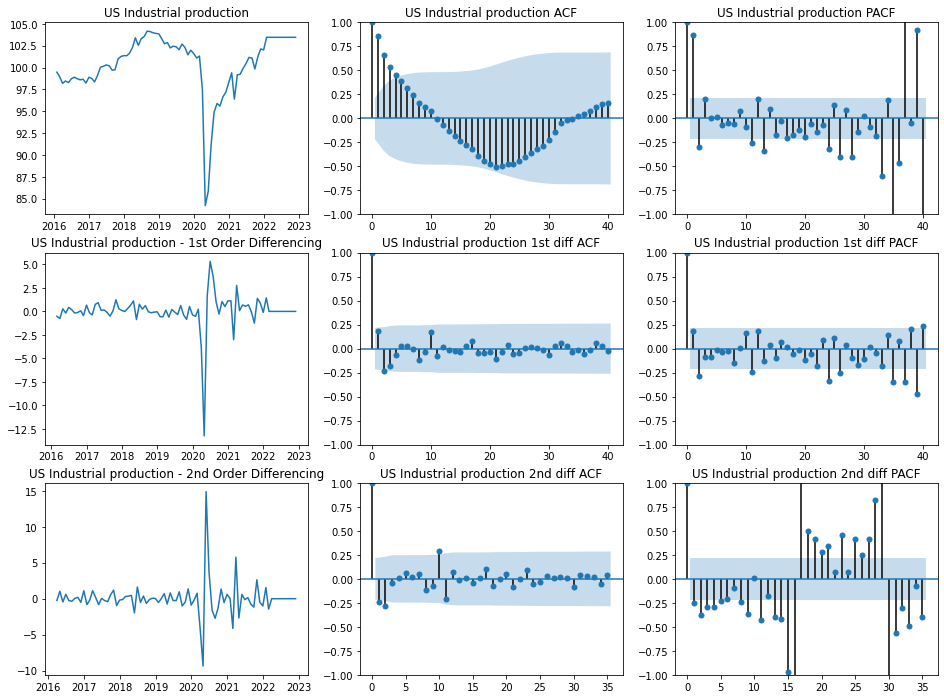

In [73]:
# plot the Industrial production series followed by ACF and PACF in first row
# first order and second order differencing plots in the next two rows
fig, ax = plt.subplots(3, 3, figsize=(16, 12))
ax[0, 0].plot(ndq_data['INDPRO']); ax[0, 0].set_title('US Industrial production')
sm.graphics.tsa.plot_acf(ndq_data['INDPRO'], title="US Industrial production ACF", lags=40, ax=ax[0, 1])
sm.graphics.tsa.plot_pacf(ndq_data['INDPRO'], title="US Industrial production PACF", lags=40, ax=ax[0, 2])

# 1st Differencing
ax[1, 0].plot(ndq_data['INDPRO'].diff()); ax[1, 0].set_title('US Industrial production - 1st Order Differencing')
sm.graphics.tsa.plot_acf(ndq_data['INDPRO'].diff().dropna(), title="US Industrial production 1st diff ACF", lags=40, ax=ax[1, 1])
sm.graphics.tsa.plot_pacf(ndq_data['INDPRO'].diff().dropna(), title="US Industrial production 1st diff PACF", lags=40, ax=ax[1, 2])

# 2nd Differencing
ax[2, 0].plot(ndq_data['INDPRO'].diff().diff()); ax[2, 0].set_title('US Industrial production - 2nd Order Differencing')
sm.graphics.tsa.plot_acf(ndq_data['INDPRO'].diff().diff().dropna(), title="US Industrial production 2nd diff ACF", lags=35, ax=ax[2, 1])
sm.graphics.tsa.plot_pacf(ndq_data['INDPRO'].diff().diff().dropna(), title="US Industrial production 2nd diff PACF", lags=35, ax=ax[2, 2])
plt.show()

All the three time-series have some trendiness, and unlikely to be stationary. Michigan consumer sentiment and Industrial production have strong cyclicity too.

*   The autocorrelation results indicate that differencing of order 1 is significant. However at order 2, we start to see strong negative autocorrelation which is likely a result of over-differencing. Hence, we stick with d=1 for the above three time-series.
*   Second, focusing on first differencing, the ACF and PACF drop close to zero after lag 1 for USDKRW, at lag 1 itself for Michigan consumer sentiment and persists to be significant until lag 2 in case of US industrial production. We can roughly assume p=1 and q=1 for an ARIMA model for USDKRW, but we test for that in detail further down below.
*   Last, but not the least, all the three time series indicate a regime change in 2020 as the first differencing plot become very volatile.



In [76]:
#ADF Test with Drift and Trend
adf_krw = ADF(data_set['USDKRW'], trend="ct", method="bic")
# print("Augmented Dickey-Fuller Unit Root Test\n", adf_krw.regression.summary())
print("\nTest statistics and critical values: \n", adf_krw)

adf_twd = ADF(ndq_data['MCONSENT'], trend="ct", method="bic")
# print("Augmented Dickey-Fuller Unit Root Test\n", adf_krw.regression.summary())
print("\nTest statistics and critical values: \n", adf_twd)

adf_thb = ADF(ndq_data['INDPRO'], trend="ct", method="bic")
# print("Augmented Dickey-Fuller Unit Root Test\n", adf_krw.regression.summary())
print("\nTest statistics and critical values: \n", adf_thb)


Test statistics and critical values: 
    Augmented Dickey-Fuller Results   
Test Statistic                 -1.915
P-value                         0.647
Lags                                1
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Test statistics and critical values: 
    Augmented Dickey-Fuller Results   
Test Statistic                 -2.322
P-value                         0.422
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.07 (1%), -3.47 (5%), -3.16 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Test statistics and critical values: 
    Augmented Dickey-Fuller Results   
Test Statistic                 -3.045
P-value               

The test statistics indicate p-value greater than 0.05 for all the three time-series, hence we cannot reject null hypothesis. Therefore, as we expected the three time series have a presence of unit root. We do further tests on their first order differencing.

In [77]:
# # KPSS test with -1 lag
# print(KPSS(data_set['USDKRW'], trend="ct", lags=-1))
# print(KPSS(ndq_data['MCONSENT'], trend="ct", lags=-1))
# print(KPSS(ndq_data['INDPRO'], trend="ct", lags=-1))

In [78]:
#ADF Test with Drift and Trend
adf_krw = ADF(data_set['USDKRW'].diff().dropna(), trend="ct", method="bic")
# print("Augmented Dickey-Fuller Unit Root Test\n", adf_krw.regression.summary())
print("\nTest statistics and critical values: \n", adf_krw)

adf_twd = ADF(ndq_data['MCONSENT'].diff().dropna(), trend="ct", method="bic")
# print("Augmented Dickey-Fuller Unit Root Test\n", adf_krw.regression.summary())
print("\nTest statistics and critical values: \n", adf_twd)

adf_thb = ADF(ndq_data['INDPRO'].diff().dropna(), trend="ct", method="bic")
# print("Augmented Dickey-Fuller Unit Root Test\n", adf_krw.regression.summary())
print("\nTest statistics and critical values: \n", adf_thb)


Test statistics and critical values: 
    Augmented Dickey-Fuller Results   
Test Statistic                -39.608
P-value                         0.000
Lags                                0
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -3.97 (1%), -3.41 (5%), -3.13 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Test statistics and critical values: 
    Augmented Dickey-Fuller Results   
Test Statistic                 -8.380
P-value                         0.000
Lags                                1
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: -4.08 (1%), -3.47 (5%), -3.16 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.

Test statistics and critical values: 
    Augmented Dickey-Fuller Results   
Test Statistic                 -7.421
P-value               

The test statistics indicate p-value is significant and less than 0.05, hence we reject the null hypthesis for all three time-series. 

In [79]:
# KPSS test with -1 lag
print(KPSS(data_set['USDKRW'].diff().dropna(), trend="ct", lags=-1))
print(KPSS(ndq_data['MCONSENT'].diff().dropna(), trend="ct", lags=-1))
print(KPSS(ndq_data['INDPRO'].diff().dropna(), trend="ct", lags=-1))

    KPSS Stationarity Test Results   
Test Statistic                  0.069
P-value                         0.360
Lags                               23
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
    KPSS Stationarity Test Results   
Test Statistic                  0.064
P-value                         0.406
Lags                               12
-------------------------------------

Trend: Constant and Linear Time Trend
Critical Values: 0.22 (1%), 0.15 (5%), 0.12 (10%)
Null Hypothesis: The process is weakly stationary.
Alternative Hypothesis: The process contains a unit root.
    KPSS Stationarity Test Results   
Test Statistic                  0.079
P-value                         0.277
Lags                               12
-------------------------------------

Trend: Constant and Linear Time T

KPSS test: The p-values are greater than 0.05 for all three time -series, hence we cannot reject null hypothesis. The ADF and KPSS test results of first order differencing confirm the three price series are weakly stationary. 

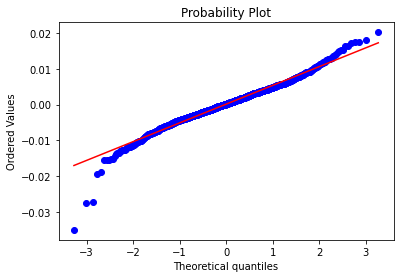

In [80]:
stats.probplot(rets['USDKRW'],dist="norm",plot=pylab)
pylab.show() #Compare USDKRW returns to a normal distribution

As we calculated returns by taking the first order differencing of log price of USDKRW, hence we will use USDKRW returns for further analysis. We plot the returns of log price series of USDKRW and find that it has extreme and skewed returns especially on negative side.

In [127]:
# Efficient ARIMA model Selection for USDKRW return series
mod_can_auto = auto_arima(rets['USDKRW'],start_p=0,start_d=0,start_q=0,
                          max_p=3,max_d=3,max_q=3,trace=True,
                          with_intercept=False,return_valid_fits=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-9963.960, Time=0.29 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-9974.102, Time=0.23 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-9973.642, Time=0.59 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-9972.429, Time=0.61 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-9972.432, Time=0.34 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-9969.953, Time=0.73 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-9973.083, Time=0.23 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.042 seconds


In [88]:
# Efficient ARIMA model Selection for Michigan consumer sentiment,1st order diff
mod_can_auto = auto_arima(np.log(ndq_data['MCONSENT']).diff().dropna(),start_p=0,start_d=0,start_q=0,
                          max_p=3,max_d=3,max_q=3,trace=True,
                          with_intercept=False,return_valid_fits=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-237.172, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-235.218, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-235.300, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-237.361, Time=0.21 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-241.698, Time=0.43 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-241.471, Time=0.12 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-240.073, Time=0.49 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-244.783, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-240.331, Time=0.13 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=-242.784, Time=0.33 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-242.784, Time=0.32 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-238.817, Time=0.23 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=-241.045, Time=0.38 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-243.876, Time=0.34 sec

Best model:  ARIMA(2,0,2)(0,0,0)

In [89]:
# Efficient ARIMA model Selection for Industrial production (1st order diff)
mod_can_auto = auto_arima(np.log(ndq_data['INDPRO']).diff().dropna(),start_p=0,start_d=0,start_q=0,
                          max_p=3,max_d=3,max_q=3,trace=True,
                          with_intercept=False,return_valid_fits=True)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-407.206, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-407.763, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-409.864, Time=0.23 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-409.119, Time=0.30 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=-411.263, Time=0.31 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-412.043, Time=0.43 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-410.156, Time=0.27 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-410.171, Time=0.25 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=-411.717, Time=0.42 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-411.856, Time=0.42 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-408.200, Time=0.21 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-410.234, Time=0.33 sec

Best model:  ARIMA(1,0,2)(0,0,0)[0]          
Total fit time: 3.355 seconds


We used first order differencing of each of the original time series as inputs due to the fact the series were stationary. Second, investors look for any new information about economy which is based on a change in an economic time series for example, industrial production or consumer sentiment. Out of the three datasets, it seems appropriate to choose USDKRW as a candidate for our MSDR model as it follows a simple ARIMA (1,0,0) process and is approximately determined by just its first order auto-regressive term.

In [131]:
msdr_model = sm.tsa.MarkovAutoregression(endog=np.log(ndq_data['INDPRO']).diff().dropna(), k_regimes=2,
    order=1, switching_variance=True,freq='M',trend='c')
msdr_model_results = msdr_model.fit(iter=1000)

In [129]:
msdr_model_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                   USDKRW   No. Observations:                 1303
Model:             MarkovAutoregression   Log Likelihood                5068.129
Date:                  Mon, 09 Jan 2023   AIC                         -10120.259
Time:                          12:29:43   BIC                         -10078.879
Sample:                      12-26-2017   HQIC                        -10104.735
                           - 12-23-2022                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.477e-05      0.000      0.714      0.475      -0.000       0.000
sigma2      1.631e-05   1.13e-06     14.433      0.000    1.41e-05    1.85e-05
ar.L1         -0.0611      0.035     -1.725      0.085      -0.131       0.008
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0002      0.000      0.607      0.544      -0.001       0.001
sigma2      5.839e-05   6.65e-06      8.774      0.000    4.53e-05    7.14e-05
ar.L1         -0.1250      0.054     -2.307      0.021      -0.231      -0.019
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9890      0.005    199.052      0.000       0.979       0.999
p[1->0]        0.0284      0.014      2.060      0.039       0.001       0.055
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
"""

 **Equations**
*   Regime 0 (Low variance regime):
    Ret(t) = 0.0000991 - 0.0611 Ret(t-1) + ε_t,where ε_t ~ N(0, 1.631e-05)
*   Regime 1 (High variance regime):
    Ret(t) = 0.0003 - 0.212 Ret(t-1) + ε_t,where ε_t ~ N(0, 5.837e-05)
*   The probability of staying in Regime 0 is 98.9%
*   The probability of switching from Regime 0 to 1 is 1.1%
*   The probability of switching from Regime 1 to 0 is 2.84%
*   The probability of staying in Regime 1 is 97.16%

**Interpretation**
*   In Regime 0, the lagged return is not statistically significant at 95% confidence level, while other coefficients look significant across regimes including the regime transition parameters.
*   When returns are in low variance regime, they have close to 1% chance to switch over to high variance regime
*   When returns are in high variance regime, they have under 3% chance to switch over to low variance regime




In [115]:
msdr_model_results.predict(start=1,end=5)

2017-12-28    0.000178
2017-12-29    0.000187
2018-01-01    0.000335
2018-01-02    0.000298
2018-01-03    0.000150
Freq: B, dtype: float64

In [137]:
msdr_model_results.predict(start=1,end=80)

2016-04-30    0.000732
2016-05-31    0.001479
2016-06-30    0.001153
2016-07-31    0.001599
2016-08-31    0.001413
                ...   
2022-07-31    0.001285
2022-08-31    0.001285
2022-09-30    0.001284
2022-10-31    0.001283
2022-11-30    0.001260
Freq: M, Length: 80, dtype: float64

In [138]:
np.log(ndq_data['INDPRO']).diff().dropna()

Date
2016-02-29   -0.005255
2016-03-31   -0.007739
2016-04-30    0.002765
2016-05-31   -0.001813
2016-06-30    0.004377
                ...   
2022-07-31    0.000000
2022-08-31    0.000000
2022-09-30    0.000000
2022-10-31    0.000000
2022-11-30    0.000000
Name: INDPRO, Length: 82, dtype: float64

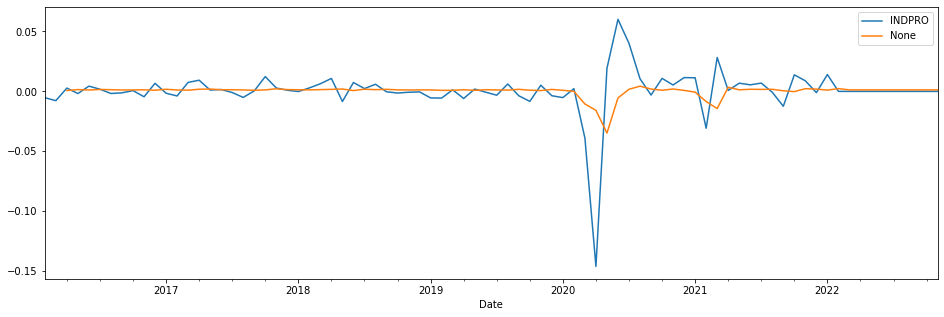

In [136]:
# rets['USDKRW'].plot(figsize=(16, 5), legend=True)
# msdr_model_results.predict(start=1,end=1200).plot(legend=True)
np.log(ndq_data['INDPRO']).diff().dropna().plot(figsize=(16, 5), legend=True)
msdr_model_results.predict(start=1,end=80).plot(legend=True)

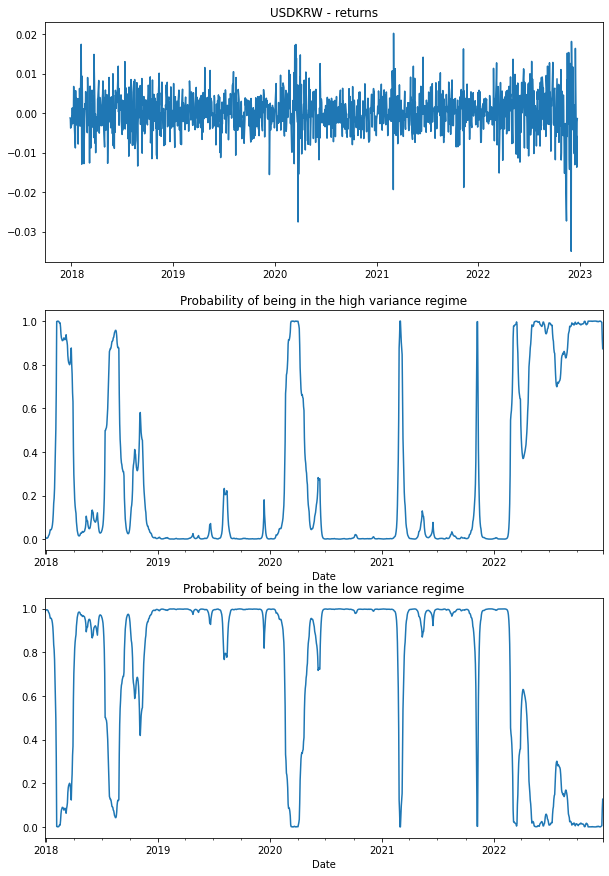

In [117]:
fig, ax = plt.subplots(3, figsize=(10, 15))
ax[0].plot(rets['USDKRW'][1:]); ax[0].set_title('USDKRW - returns')
msdr_model_results.smoothed_marginal_probabilities[1].plot(
    title="Probability of being in the high variance regime",ax=ax[1])
msdr_model_results.smoothed_marginal_probabilities[0].plot(
    title="Probability of being in the low variance regime",ax=ax[2])
plt.show()

In [118]:
print(msdr_model_results.expected_durations)

[91.02626979 35.20133987]


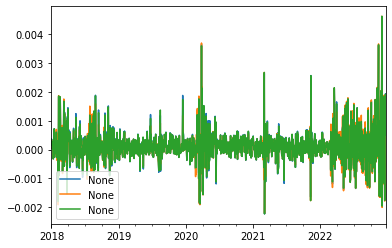

In [119]:
# msdr_model_results.predict(start=1,end=10).plot()
stop=len(rets.USDKRW.index)
msdr_model_results.predict(start=1,end=stop-2,probabilities='predicted').plot()
msdr_model_results.predict(start=1,end=stop-2,probabilities='smoothed').plot()
msdr_model_results.predict(start=1,end=stop-2,probabilities='filtered').plot()
plt.legend(loc='lower left')
plt.show()

In [120]:
msdr_model_results.predict(start=1,end=10,probabilities='predicted')

2017-12-28    0.000218
2017-12-29    0.000213
2018-01-01    0.000370
2018-01-02    0.000323
2018-01-03    0.000160
2018-01-04    0.000268
2018-01-05    0.000022
2018-01-08    0.000275
2018-01-09    0.000139
2018-01-10   -0.000325
Freq: B, dtype: float64

**Damage**

**Directions**

**Deployment**

## **References**

1.   Piger, J. (2009). Econometrics: Models of Regime Changes. In: Meyers, 
R. (eds) Complex Systems in Finance and Econometrics. Springer, New York, NY. https://doi.org/10.1007/978-1-4419-7701-4_10 

2.   https://www.sciencedirect.com/topics/mathematics/markov-process

3. https://www.stata.com/manuals14/tsmswitch.pdf

4. RECPROB is the smoothed recession probabilities for the United States, not seasonally adjusted : http://faculty.ucr.edu/~chauvet/ier.pdf

5. MCONSENT is the University of Michigan Consumer Survey,Index of Consumer Sentiment: https://data.sca.isr.umich.edu/agreement.php

6. POLUNCERT is the Economic Policy Uncertainty Index for United States: http://www.policyuncertainty.com/media/BakerBloomDavis.pdf

7. INDPRO is the US industrial production index, Index 2007=100 Seasonally Adjusted : https://fred.stlouisfed.org/graph/fredgraph.csv?id=INDPRO



